In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from scipy.stats import linregress

In [2]:
nfl_stats = "nfl resources/NFL_Stats.csv"
nfl_stats_df = pd.read_csv(nfl_stats)
nfl_stats_df
nfl_stats_df.columns

Index(['Rk', 'Player', 'From', 'To', 'Draft', 'Tm', 'Lg', 'Ht', 'Wt', 'BMI',
       'G', 'GS', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'Int', 'Rate', 'Y/A',
       'Y/G', 'W', 'L', 'T', 'Yrs', 'PB', 'AP1', 'AV'],
      dtype='object')

In [3]:
# Clean Dataframe by renaming and deleting unnecssary columns

nfl_stats_df = nfl_stats_df.rename(columns={"Tm":"Team",
                                           "PB":"Pro Bowls",
                                           "Ht": "Height (in)"})
del nfl_stats_df["Wt"]
del nfl_stats_df["BMI"]
del nfl_stats_df["AV"]
del nfl_stats_df["AP1"]
del nfl_stats_df["Rk"]
del nfl_stats_df["Lg"]
del nfl_stats_df["Team"]


nfl_stats_df.head()


#Draft Position vs. Passer Rating

,Player,From,To,Draft,Height (in),G,GS,Cmp,Att,Cmp%,...,TD,Int,Rate,Y/A,Y/G,W,L,T,Yrs,Pro Bowls
0,Peyton Manning,1998,2015,1.0,77,266,265,6125,9380,65.30,...,539,251,96.5,7.67,270.5,186.0,79.0,0.0,17,14
1,Tom Brady,2000,2018,6.0,80,253,251,5629,8805,63.93,...,488,160,97.6,7.51,261.5,196.0,55.0,0.0,19,13
2,Drew Brees,2001,2018,2.0,72,249,248,6222,9294,66.95,...,488,228,96.7,7.58,282.9,142.0,106.0,0.0,18,11
3,Brett Favre*,1991,2010,2.0,74,302,298,6300,10169,61.95,...,508,336,86.0,7.06,237.9,186.0,112.0,0.0,20,11
4,John Elway*,1983,1998,1.0,75,234,231,4123,7250,56.87,...,300,226,79.9,7.10,220.0,148.0,82.0,1.0,16,9


In [4]:
#nfl_stats_df.loc[:, ["From", "Draft", "Yrs", "Pro Bowls"]]



In [5]:
draft_df= nfl_stats_df.groupby("Draft")

avg_draft_position = pd.DataFrame(draft_df ["Draft"].mean())


In [6]:
#Get Winning Percentage
nfl_stats_df ["W"].fillna(0, inplace=True)
nfl_stats_df ["L"].fillna(0, inplace=True)
nfl_stats_df ["T"].fillna(0, inplace=True)

nfl_stats_df["Win Record"] = (nfl_stats_df["W"]/(nfl_stats_df["W"] + nfl_stats_df["L"] + nfl_stats_df["T"]))

nfl_stats_df

,Player,From,To,Draft,Height (in),G,GS,Cmp,Att,Cmp%,...,Int,Rate,Y/A,Y/G,W,L,T,Yrs,Pro Bowls,Win Record
0,Peyton Manning,1998,2015,1.0,77,266,265,6125,9380,65.30,...,251,96.5,7.67,270.5,186.0,79.0,0.0,17,14,0.701887
1,Tom Brady,2000,2018,6.0,80,253,251,5629,8805,63.93,...,160,97.6,7.51,261.5,196.0,55.0,0.0,19,13,0.780876
2,Drew Brees,2001,2018,2.0,72,249,248,6222,9294,66.95,...,228,96.7,7.58,282.9,142.0,106.0,0.0,18,11,0.572581
3,Brett Favre*,1991,2010,2.0,74,302,298,6300,10169,61.95,...,336,86.0,7.06,237.9,186.0,112.0,0.0,20,11,0.624161
4,John Elway*,1983,1998,1.0,75,234,231,4123,7250,56.87,...,226,79.9,7.10,220.0,148.0,82.0,1.0,16,9,0.640693
5,Dan Marino*,1983,1999,1.0,76,242,240,4967,8358,59.43,...,252,86.4,7.34,253.6,147.0,93.0,0.0,17,9,0.612500
6,Warren Moon*,1984,2000,NaN,75,208,203,3988,6823,58.45,...,233,80.9,7.23,237.1,102.0,101.0,0.0,17,9,0.502463
7,Joe Montana*,1983,1994,3.0,74,136,131,2696,4261,63.27,...,107,93.4,7.62,238.8,99.0,32.0,0.0,11,7,0.755725
8,Philip Rivers,2004,2018,1.0,77,196,192,4171,6492,64.25,...,166,94.8,7.76,256.9,106.0,86.0,0.0,15,7,0.552083
9,Steve Young*,1985,1999,1.0,74,169,143,2667,4149,64.28,...,107,96.8,7.98,196.0,94.0,49.0,0.0,15,7,0.657343


In [7]:
reduced_nfl_stats_df = nfl_stats_df.loc[:,["Player","Draft", "Rate", "Pro Bowls", "Win Record"]]
reduced_nfl_stats_df

,Player,Draft,Rate,Pro Bowls,Win Record
0,Peyton Manning,1.0,96.5,14,0.701887
1,Tom Brady,6.0,97.6,13,0.780876
2,Drew Brees,2.0,96.7,11,0.572581
3,Brett Favre*,2.0,86.0,11,0.624161
4,John Elway*,1.0,79.9,9,0.640693
5,Dan Marino*,1.0,86.4,9,0.612500
6,Warren Moon*,NaN,80.9,9,0.502463
7,Joe Montana*,3.0,93.4,7,0.755725
8,Philip Rivers,1.0,94.8,7,0.552083
9,Steve Young*,1.0,96.8,7,0.657343


In [8]:

percent_nfl_stats_df = reduced_nfl_stats_df.copy()

percent_nfl_stats_df = percent_nfl_stats_df.dropna()

percent_nfl_stats_df['Win Record'].dtype


dtype('float64')

In [9]:

#percent_nfl_stats_df["Win Record"] = percent_nfl_stats_df["Win Record"]
percent_nfl_stats_df["Win Record"] = percent_nfl_stats_df["Win Record"]*100
#percent_nfl_stats_df["Win Record"] = percent_nfl_stats_df["Win Record"].map("{:.2f}%".format)

percent_nfl_stats_df

,Player,Draft,Rate,Pro Bowls,Win Record
0,Peyton Manning,1.0,96.5,14,70.188679
1,Tom Brady,6.0,97.6,13,78.087649
2,Drew Brees,2.0,96.7,11,57.258065
3,Brett Favre*,2.0,86.0,11,62.416107
4,John Elway*,1.0,79.9,9,64.069264
5,Dan Marino*,1.0,86.4,9,61.250000
7,Joe Montana*,3.0,93.4,7,75.572519
8,Philip Rivers,1.0,94.8,7,55.208333
9,Steve Young*,1.0,96.8,7,65.734266
10,Troy Aikman*,1.0,81.6,6,56.969697


In [10]:
#Averages for draft, rate, pro bowls, win record

grpby_draft = reduced_nfl_stats_df.groupby("Draft", as_index=False)
average_rate = pd.DataFrame(grpby_draft ["Rate"].mean())
average_rate

,Draft,Rate
0,1.0,75.725962
1,2.0,68.637209
2,3.0,71.063265
3,4.0,68.622642
4,5.0,60.196970
5,6.0,65.343137
6,7.0,64.761765
7,8.0,64.581818
8,9.0,67.300000
9,10.0,66.225000


In [11]:
average_rate.dtypes
average_rate["Draft"]=average_rate["Draft"].astype(float)

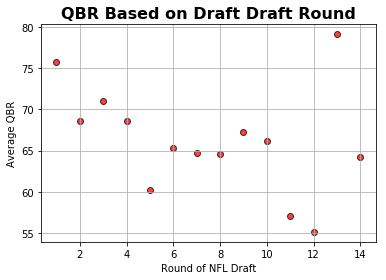

In [12]:
#QBR Scatter Plot
plt.scatter(average_rate["Draft"], average_rate["Rate"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("QBR Based on Draft Draft Round", fontsize=16, fontweight="bold")
plt.xlabel("Round of NFL Draft")
plt.ylabel("Average QBR")
plt.grid()

plt.show()


In [13]:
#Pro Bowl PLot
grpby_probowl = percent_nfl_stats_df.groupby("Draft", as_index=False)
average_probowl = pd.DataFrame(grpby_probowl ["Pro Bowls"].mean())
average_probowl


,Draft,Pro Bowls
0,1.0,1.303922
1,2.0,1.135135
2,3.0,0.456522
3,4.0,0.225000
4,5.0,0.115385
5,6.0,0.648649
6,7.0,0.086957
7,8.0,0.444444
8,9.0,0.400000
9,10.0,0.250000


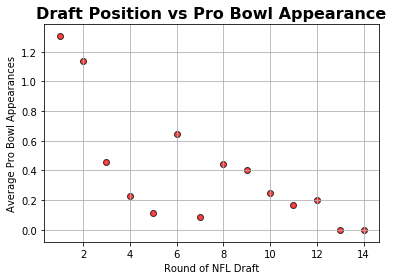

In [14]:
plt.scatter(average_probowl["Draft"], average_probowl["Pro Bowls"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)


plt.title("Draft Position vs Pro Bowl Appearance", fontsize=16, fontweight="bold")
plt.xlabel("Round of NFL Draft")
plt.ylabel("Average Pro Bowl Appearances")
plt.grid()

plt.show()


In [15]:
#Win Record
grpby_win_record = percent_nfl_stats_df.groupby("Draft", as_index=False)
average_win_record = pd.DataFrame(grpby_win_record ["Win Record"].mean())
average_win_record

,Draft,Win Record
0,1.0,45.550533
1,2.0,42.155232
2,3.0,31.308655
3,4.0,33.838160
4,5.0,37.366509
5,6.0,31.816923
6,7.0,29.425828
7,8.0,41.271046
8,9.0,42.145397
9,10.0,38.322701


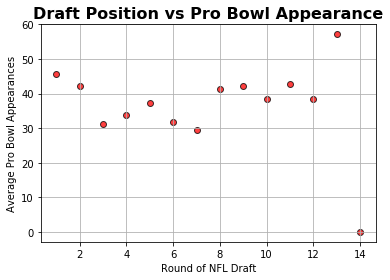

In [19]:
plt.scatter(average_win_record["Draft"], average_win_record["Win Record"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("Draft Position vs Pro Bowl Appearance", fontsize=16, fontweight="bold")
plt.xlabel("Round of NFL Draft")
plt.ylabel("Average Pro Bowl Appearances")
plt.grid()